### TASK 3 IRIS FLOWER CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

#warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
iris=pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
# Encoding the species column:-

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
iris["species"]=le.fit_transform(iris["species"])

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Since rows are in sorted order based on o/p column .so lets suffle the rows:

In [9]:
iris = iris.sample(frac=1).reset_index(drop=True)

In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,0
1,4.8,3.0,1.4,0.3,0
2,6.9,3.2,5.7,2.3,2
3,6.7,3.1,5.6,2.4,2
4,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
145,5.9,3.0,4.2,1.5,1
146,6.5,3.2,5.1,2.0,2
147,6.0,3.0,4.8,1.8,2
148,6.6,3.0,4.4,1.4,1


In [11]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
is_inf = np.isinf(iris)
print(is_inf.sum()) 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


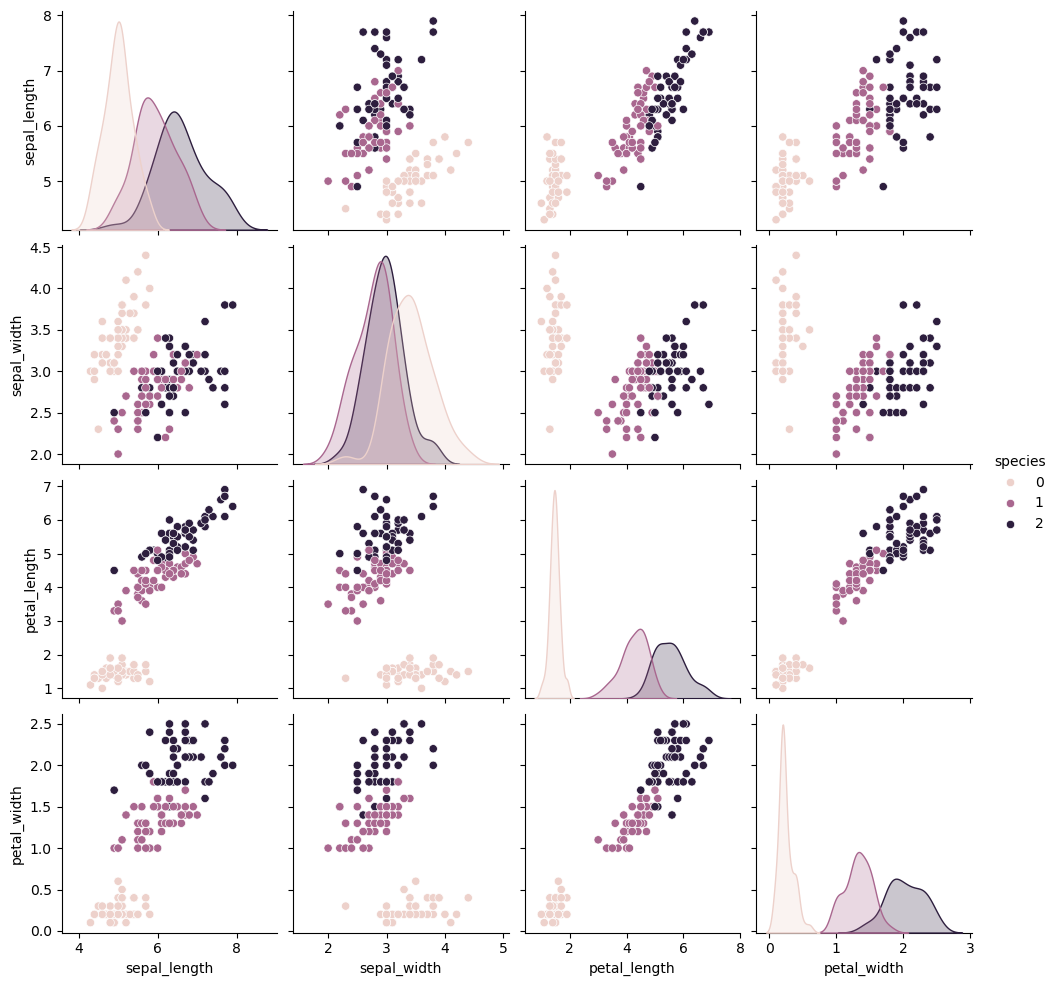

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
sns.pairplot(data=iris,hue="species")


<Axes: >

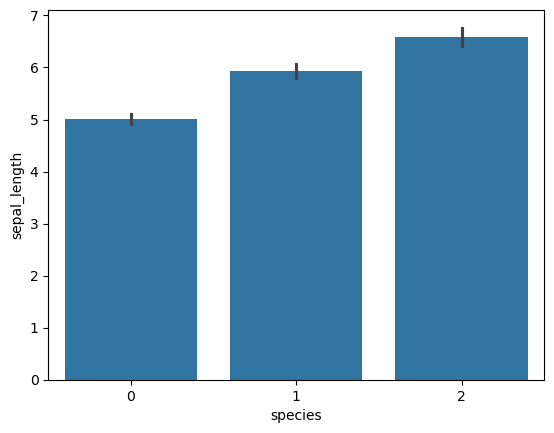

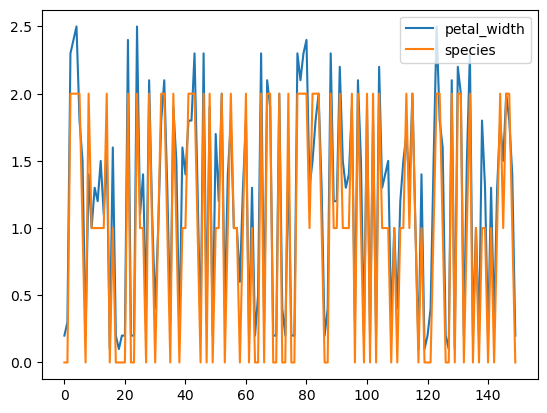

In [14]:
sns.barplot(iris, x="species", y="sepal_length")
iris.iloc[:,3:].plot(kind="line")

In [15]:
# since we are using voting classifier (Ensemle learning) so lets apply it on making the iris dataset complex to clssify by using only ("sepal length" and "sepal width ") columns and except IRIS-setosa(0) class :-

In [16]:
iris_new=iris[iris['species']!=0][["sepal_length","sepal_width",'species']]
iris_new

,sepal_length,sepal_width,species
2,6.9,3.2,2
3,6.7,3.1,2
4,7.2,3.6,2
5,5.9,3.0,2
6,6.5,2.8,1
...,...,...,...
144,6.1,3.0,2
145,5.9,3.0,1
146,6.5,3.2,2
147,6.0,3.0,2


In [17]:
# splitting the data into i/p and o/p columns:-

In [18]:
X=iris.iloc[:,0:2]   #i/p columns
Y=iris.iloc[:,-1]    #o/p column

In [19]:
X

,sepal_length,sepal_width
0,5.8,4.0
1,4.8,3.0
2,6.9,3.2
3,6.7,3.1
4,7.2,3.6
...,...,...
145,5.9,3.0
146,6.5,3.2
147,6.0,3.0
148,6.6,3.0


In [20]:
Y

0      0
1      0
2      2
3      2
4      2
      ..
145    1
146    2
147    2
148    1
149    0
Name: species, Length: 150, dtype: int64

In [21]:
# importing the different classifiers:-

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
LRC=LogisticRegression()
KNC=KNeighborsClassifier()
RFC=RandomForestClassifier()

In [24]:
estimators=[('lr',LRC),('knn',KNC),('rf',RFC)]

In [25]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,Y,scoring='accuracy')
    print(estimator[1],'--',np.round(np.mean(x),2))

LogisticRegression() -- 0.81
KNeighborsClassifier() -- 0.77
RandomForestClassifier() -- 0.71


In [26]:
from sklearn.ensemble import VotingClassifier

In [27]:
# Hard Voting:

In [28]:
vc1 = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc1,X,Y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


In [29]:
# soft votting:

In [30]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,Y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


In [31]:
# weighted voitng:

In [32]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,Y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.74
for i=1,j=1,k=3 0.74
for i=1,j=2,k=1 0.78
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.77
for i=1,j=3,k=2 0.77
for i=1,j=3,k=3 0.76
for i=2,j=1,k=1 0.79
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.76
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.78
for i=2,j=2,k=3 0.75
for i=2,j=3,k=1 0.78
for i=2,j=3,k=2 0.78
for i=2,j=3,k=3 0.76
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.77
for i=3,j=2,k=1 0.79
for i=3,j=2,k=2 0.79
for i=3,j=2,k=3 0.77
for i=3,j=3,k=1 0.78
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.78


In [33]:
# Classifiers of Same Algorithm :

In [34]:
from sklearn.svm import SVC

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

In [36]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [37]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
